In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 定义一个多层感知器（MLP）类，继承自 nn.Module
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()

        # 构建网络结构
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        # 定义前向传播
        x = x.view(x.size(0), -1) # Flatten the input tensor
        out = self.layers(x)
        return out

# 超参数设置
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# 加载MNIST数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 创建模型、损失函数和优化器对象
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
mlp_loss=[]
test_cor=[]
pre_cor=[]
# 开始训练
for epoch in range(num_epochs):
    total=0
    correct=0
    for i, (images, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(images)
        _,pre = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct+=(pre == labels).sum().item()
        # 计算损失
        loss = criterion(outputs, labels)
        if (i+1) % 938 == 0:
            mlp_loss.append(loss.item())
            test_cor.append(100 * correct / total)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 输出损失信息
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")




100%|██████████| 9912422/9912422 [00:03<00:00, 2554867.18it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 289308.29it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 894506.16it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4525066.22it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch [1/10], Step [100/938], Loss: 0.4257
Epoch [1/10], Step [200/938], Loss: 0.3753
Epoch [1/10], Step [300/938], Loss: 0.2831
Epoch [1/10], Step [400/938], Loss: 0.1524
Epoch [1/10], Step [500/938], Loss: 0.1870
Epoch [1/10], Step [600/938], Loss: 0.2876
Epoch [1/10], Step [700/938], Loss: 0.2176
Epoch [1/10], Step [800/938], Loss: 0.0658
Epoch [1/10], Step [900/938], Loss: 0.1965
Epoch [2/10], Step [100/938], Loss: 0.1176
Epoch [2/10], Step [200/938], Loss: 0.0353
Epoch [2/10], Step [300/938], Loss: 0.1134
Epoch [2/10], Step [400/938], Loss: 0.0348
Epoch [2/10], Step [500/938], Loss: 0.0208
Epoch [2/10], Step [600/938], Loss: 0.2798
Epoch [2/10], Step [700/938], Loss: 0.0974
Epoch [2/10], Step [800/938], Loss: 0.0400
Epoch [2/10], Step [900/938], Loss: 0.1323
Epoch [3/10], Step [100/938], Loss: 0.0693
Epoch [3/10], Step [200/938], Loss: 0.0623
Epoch [3/10], Step [300/938], Loss: 0.0855
Epoch [3/10], Step [40

In [2]:

# 测试模型
model.eval()
correct = 0
total = 0
i=0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct+=(predicted == labels).sum().item()
        i+=1
        if i% 15==0:
            pre_cor.append(100 * correct / total)
    

print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Accuracy of the model on the 10000 test images: 97.83%


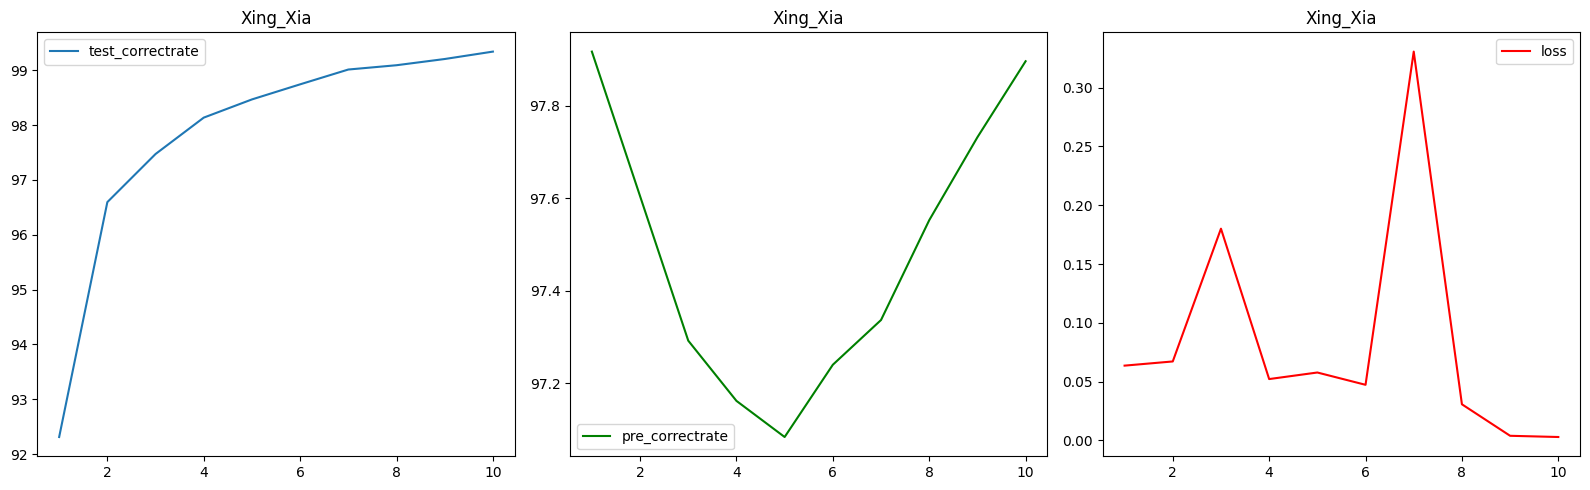

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"  # 防止plt发疯用的
plt.figure(figsize=(16, 5))

plt.subplot(133)
plt.plot([i + 1 for i in range(10)], mlp_loss, label='loss',color='red')
plt.title('Xing_Xia')
plt.legend()

plt.subplot(132)
plt.plot( [i + 1 for i in range(10)], pre_cor,label='pre_correctrate',color='green')
plt.title('Xing_Xia')
plt.legend()
plt.subplot(131)
plt.plot([i + 1 for i in range(10)],test_cor, label='test_correctrate')
plt.title('Xing_Xia')
plt.legend()

plt.tight_layout()
plt.show()